In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
import PIL


DATADIR = "D:\projectmachinelearning\Skripsi\images"
CATEGORIES = ["Edible", "Inedible", "Poisonous"]


In [31]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATADIR,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATADIR,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3664 files belonging to 3 classes.
Using 2932 files for training.
Found 3664 files belonging to 3 classes.
Using 732 files for validation.


In [35]:
class_name = val_ds.class_names

print(class_name)

AttributeError: 'BatchDataset' object has no attribute 'labels'

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers



In [17]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [18]:
num_classes = 3

model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# model = tf.keras.models.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
# 	layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
# 	layers.MaxPooling2D(2,2),
# 	layers.Conv2D(64, (3,3), activation='relu'),
# 	layers.MaxPooling2D(2,2),
# 	layers.Conv2D(128, (3,3), activation='relu'),
# 	layers.MaxPooling2D(2,2),
# 	layers.Conv2D(128, (3,3), activation='relu'),
# 	layers.MaxPooling2D(2,2),
# 	layers.Dropout(0.5),
# 	layers.Flatten(),
# 	layers.Dense(512, activation='relu'),
# 	layers.Dense(1, activation='sigmoid')
# 	])

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [21]:
epochs =10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
92/92 [==============================] - 55s 401ms/step - loss: 1.1373 - accuracy: 0.3467 - val_loss: 1.0818 - val_accuracy: 0.4208
Epoch 2/10
92/92 [==============================] - 28s 299ms/step - loss: 1.0501 - accuracy: 0.4461 - val_loss: 0.9946 - val_accuracy: 0.5123
Epoch 3/10
92/92 [==============================] - 27s 298ms/step - loss: 0.9162 - accuracy: 0.5690 - val_loss: 0.7588 - val_accuracy: 0.6735
Epoch 4/10
92/92 [==============================] - 27s 299ms/step - loss: 0.6072 - accuracy: 0.7570 - val_loss: 0.5766 - val_accuracy: 0.7664
Epoch 5/10
92/92 [==============================] - 28s 302ms/step - loss: 0.3221 - accuracy: 0.8887 - val_loss: 0.4943 - val_accuracy: 0.7896
Epoch 6/10
92/92 [==============================] - 28s 302ms/step - loss: 0.1793 - accuracy: 0.9368 - val_loss: 0.4680 - val_accuracy: 0.8429
Epoch 7/10
92/92 [==============================] - 28s 299ms/step - loss: 0.0701 - accuracy: 0.9815 - val_loss: 0.5556 - val_accuracy: 0.8415

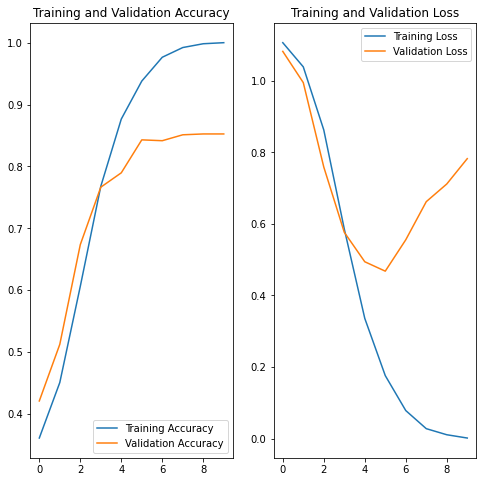

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
loss, accuracy = model.evaluate(val_ds)
print(loss)
print(accuracy)

23/23 [==============================] - 3s 97ms/step - loss: 0.7822 - accuracy: 0.8525
0.782220721244812
0.8524590134620667


In [102]:
model.evaluate(val_ds)

23/23 [==============================] - 3s 97ms/step - loss: 0.7822 - accuracy: 0.8525


[0.7822205424308777, 0.8524590134620667]